In [1]:
from __future__ import division
# %pylab
import numpy as np
from numpy import pi
import epg

In [2]:
np.set_printoptions(suppress=True, precision=4, linewidth=300)

In [3]:
T1 = 1000e-3
T2 = 100e-3
TE = 5e-3

P_z = np.array([[0],[0],[1]])
P_xy = np.array([[1],[1],[0]])

def eRF(P, a, p):
    return epg.rf(P, np.pi/180 * a, np.pi/180*p)

def eTE(P, a, p):
    return epg.FSE_TE(P, a * np.pi/180, p * np.pi / 180, TE, T1, T2)

def eRelax(P, T):
    return epg.relax(P, T, T1, T2)

def eGrad(P):
    return epg.grad(P)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
P1 = epg.rf(P_z, 160*pi/180, pi/2)
print P1
P2 = epg.relax(P1, 15e-3, T1, T2)
P3 = epg.rf(P2, pi/2, pi/2)
print P3
P4 = epg.FSE_TE(P3, 180*pi/180, 0, TE, T1, T2)
print P4

[[ 0.3420-0.j]
 [ 0.3420+0.j]
 [-0.9397+0.j]]
[[-0.9108+0.j]
 [-0.9108-0.j]
 [-0.2944+0.j]]
[[-0.8664-0.j  0.0000+0.j -0.0000+0.j]
 [-0.8664+0.j  0.0000+0.j  0.0000+0.j]
 [ 0.2929+0.j  0.0000+0.j  0.0000+0.j]]


[[ 1.0000-0.j]
 [ 0.7134+0.j]
 [ 0.8639-0.j]]


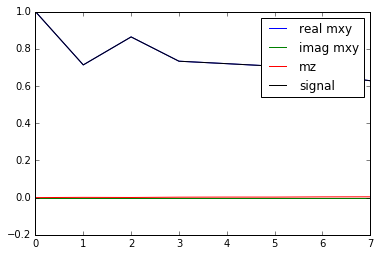

In [6]:
flip_rad = np.array([0 + 90j, 90 + 90j, 120, 120, 120, 120, 120, 120, 120]) * pi / 180
TI = 15e-3
Mxy, Mz = epg.FSE_signal2(np.real(flip_rad), np.imag(flip_rad), TE, T1, T2, TI)
print Mxy[:3]
fig = plt.figure()
plt.plot(np.real(Mxy))
plt.plot(np.imag(Mxy))
plt.plot(Mz)
plt.plot(np.abs(Mxy), 'k')
plt.legend(('real mxy', 'imag mxy', 'mz', 'signal'))

[[ 1.0000-0.j]
 [ 0.7134+0.j]
 [ 0.7998+0.j]]


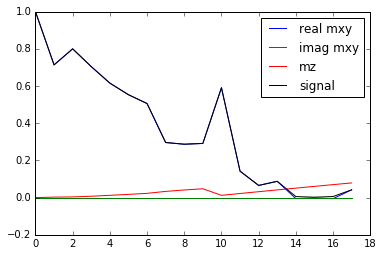

In [11]:
flip_rad = np.array([0 + 90j, 90 + 90j, 120, 100, 90, 80, 70, 60, 30, 30, 30, 90, 0, 0, 0, 0, 0, 0, 0]) * pi / 180
TI = 0e-3
T1=1000e-3
T1=500e-3
Mxy, Mz = epg.FSE_signal2(np.real(flip_rad), np.imag(flip_rad), TE, T1, T2, TI)
print Mxy[:3]
fig = plt.figure()
plt.plot(np.real(Mxy))
plt.plot(np.imag(Mxy))
plt.plot(Mz)
plt.plot(np.abs(Mxy), 'k')
plt.legend(('real mxy', 'imag mxy', 'mz', 'signal'))

In [8]:
T1 = 600e-3;
P = epg.rf(P_z, pi, pi/2)
P = epg.relax(P, 10e-3, T1, T2)

flip_rad = np.array([90, 180, 180, 180, 180, 10, 0, 80, 100]) * pi / 180
Mxy, Mz = epg.FSE_signal2(np.real(flip_rad), np.imag(flip_rad), TE, T1, T2, P)

fig = plt.figure()
plt.plot(np.abs(Mxy))
plt.plot(Mz)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
eTE(eRF(eTE(eRF(P_z, 180, 90),0, 0), 90, 90), 180, 0)

In [ ]:
np.hstack((np.array([0,1]), np.array([2,3])))

In [ ]:
epg.rf(np.array([0,0,1]).T,pi/3, 0)

In [92]:
np.insert?